In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
INPUT_FOLDER = "../data/raw"
OUTPUT_FOLDER ="../data/processed"

red_wine_file= "winequality-red.csv"
white_wine_file = "winequality-white.csv"  

In [3]:
def rename_columns(data:pd.DataFrame):
    new_columns_name = [name.replace(" ","_") for name in data.columns]
    data.columns = new_columns_name
    return data

## 1. Join files red and white wines

In [4]:
red_wine_data = pd.read_csv(os.path.join(INPUT_FOLDER, red_wine_file), sep=";")
red_wine_data = rename_columns(data=red_wine_data)
red_wine_data["color"]='red'

white_wine_data = pd.read_csv(os.path.join(INPUT_FOLDER, white_wine_file), sep=";")
white_wine_data = rename_columns(data=white_wine_data)
white_wine_data["color"]='white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

wine_data.to_csv(os.path.join(OUTPUT_FOLDER, "wine_data.csv"), sep=";",index=False)

In [5]:
wine_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## 2. Split data, train and test

Before conducting Exploratory Data Analysis (EDA), it is recommended to first divide the data into training and testing sets. This practice is crucial for several reasons:

1. Preventing Overfitting: Splitting the data helps prevent overfitting, where a model fits too closely to the training data but doesn't generalize well to new data.

2. Model Evaluation: By dividing the data, you can train the model on the training set and then evaluate its performance on the testing set. This provides a more realistic assessment of how the model will perform with new data.

3. Effective EDA: Having a training set allows for thorough Exploratory Data Analysis, including exploring variable distributions, relationships between features, handling outliers, etc. This helps in gaining insights into the data before applying predictive models.


In [6]:
def target_distribution_plot(Y, text:str):
    plt.figure(figsize=(6, 4))  # Reduce the size to 6x4 inches
    plt.hist(Y, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Target Variable {text}')
    plt.xlabel('Variable Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

In [7]:
RANDOM_STATE=323
test_size=0.2

In [8]:
target = "quality"
Y = wine_data.get(target,"")
X = wine_data.drop(columns=[target], inplace=False)


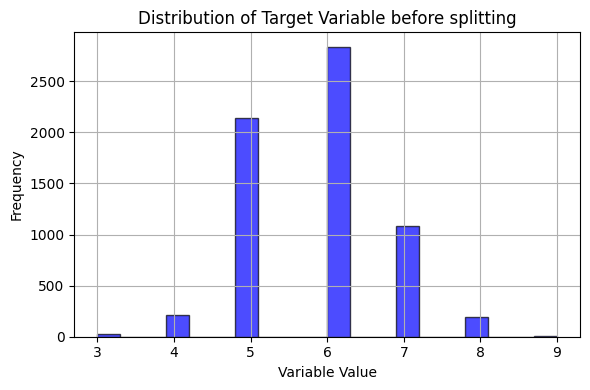

In [9]:
target_distribution_plot(Y, text="before splitting")

In [10]:
"""
Important Note (Common  mistake): 

stratify=y : This parameter ensures that the distribution of the target/label variable y is preserved in the training and testing sets. 
This is important for maintaining the representativeness of the data.

"""
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=RANDOM_STATE)

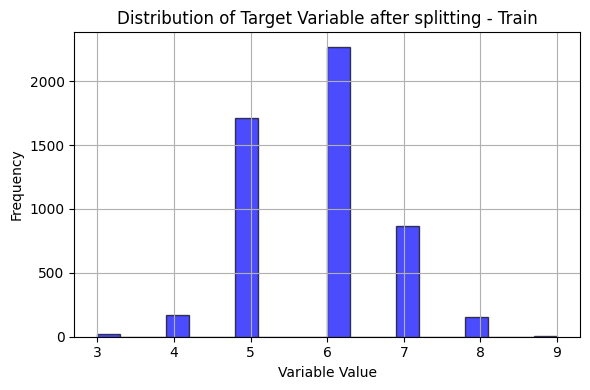

In [11]:
target_distribution_plot(y_train,text="after splitting - Train")

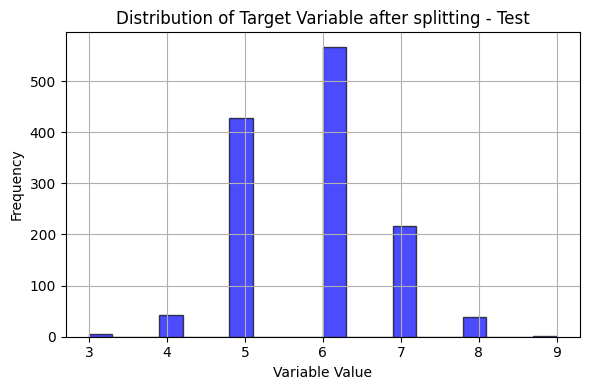

In [12]:
target_distribution_plot(y_test, text="after splitting - Test")

In [13]:
train_data = pd.concat([X_train,y_train], axis=1)
train_data.rename(columns={'quality': 'target'}, inplace=True)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.rename(columns={'quality': 'target'}, inplace=True)

In [14]:
test_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color,target
1625,6.9,0.240,0.35,1.0,0.052,35.0,146.0,0.99300,3.45,0.44,10.0,white,6
3159,7.8,0.300,0.74,1.8,0.033,33.0,156.0,0.99100,3.29,0.52,12.8,white,6
699,11.8,0.380,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,red,6
2436,7.3,0.250,0.36,2.1,0.034,30.0,177.0,0.99085,3.25,0.40,11.9,white,8
4451,7.9,0.200,0.39,1.0,0.041,37.0,154.0,0.99093,3.08,0.43,11.9,white,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,6.2,0.160,0.34,1.7,0.038,85.0,153.0,0.99090,3.33,0.86,12.0,white,7
3420,7.4,0.290,0.31,1.7,0.035,23.0,110.0,0.99260,3.07,0.38,10.9,white,5
296,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,red,5
6128,7.3,0.260,0.53,12.7,0.047,60.5,164.5,0.99840,3.06,0.45,9.1,white,6


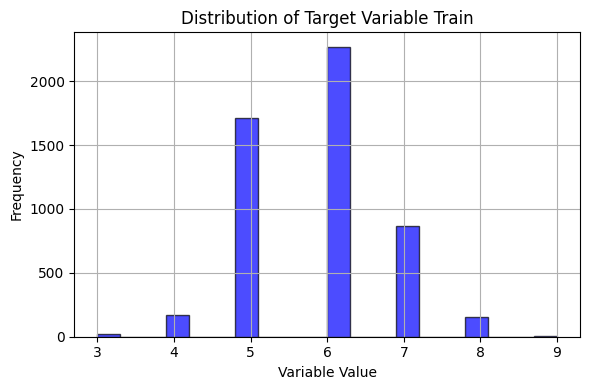

In [15]:
target_distribution_plot(train_data.target, text="Train")

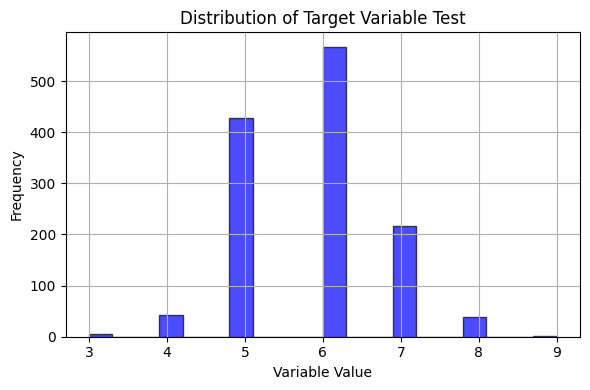

In [16]:
target_distribution_plot(test_data.target, text="Test")

In [17]:
train_data.shape

(5197, 13)

In [18]:
test_data.shape

(1300, 13)

## Check data

In [19]:
print(len(train_data)+len(test_data) == len(wine_data))

True


In [20]:
print(len(wine_data)*test_size, len(test_data))

print(len(wine_data)*(1-test_size), len(train_data))

1299.4 1300
5197.6 5197


## Save data

In [21]:
train_data.to_csv(os.path.join(OUTPUT_FOLDER,'train_data.csv'), sep=";",index=False)
test_data.to_csv(os.path.join(OUTPUT_FOLDER, 'test_data.csv'), sep=";", index=False)